In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df=pd.read_csv(r"C:\Users\Tanisha Narayan\OneDrive\Bostonh.csv")

In [5]:
df.head(10)


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [6]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


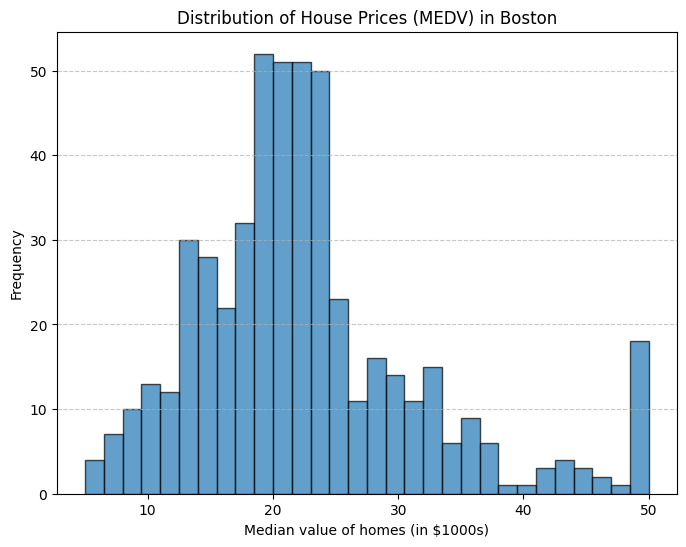

In [7]:
plt.figure(figsize=(8,6))
plt.hist(df['MEDV'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel("Median value of homes (in $1000s)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices (MEDV) in Boston")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Top 5 rows with highest CRIM values and their house prices (MEDV):
        CRIM  MEDV
380  88.9762  10.4
418  73.5341   8.8
405  67.9208   5.0
410  51.1358  15.0
414  45.7461   7.0


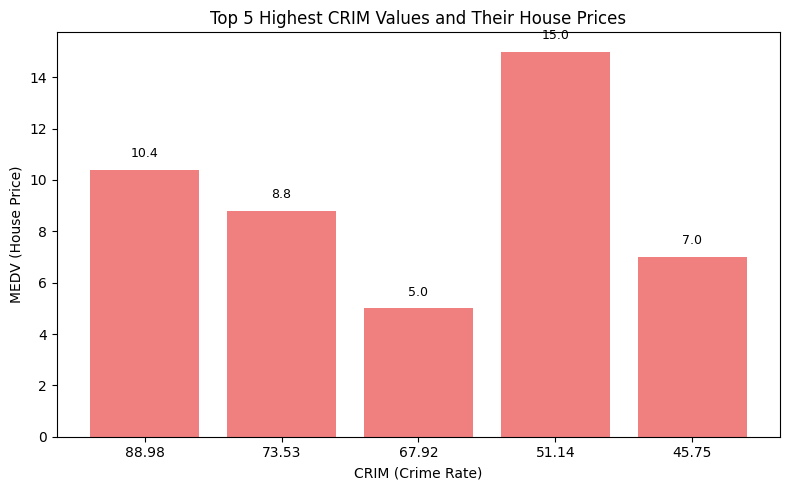

In [10]:

top5_crim = df.nlargest(5, 'CRIM')[['CRIM', 'MEDV']]
print("Top 5 rows with highest CRIM values and their house prices (MEDV):")
print(top5_crim)

# Step 3: Plot bar graph (CRIM on X-axis)
plt.figure(figsize=(8,5))
plt.bar(top5_crim['CRIM'].round(2).astype(str), top5_crim['MEDV'], color='lightcoral')

# Labels and title
plt.xlabel('CRIM (Crime Rate)')
plt.ylabel('MEDV (House Price)')
plt.title('Top 5 Highest CRIM Values and Their House Prices')

# Annotate MEDV values on top of bars
for i, value in enumerate(top5_crim['MEDV']):
    plt.text(i, value + 0.5, f"{value}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

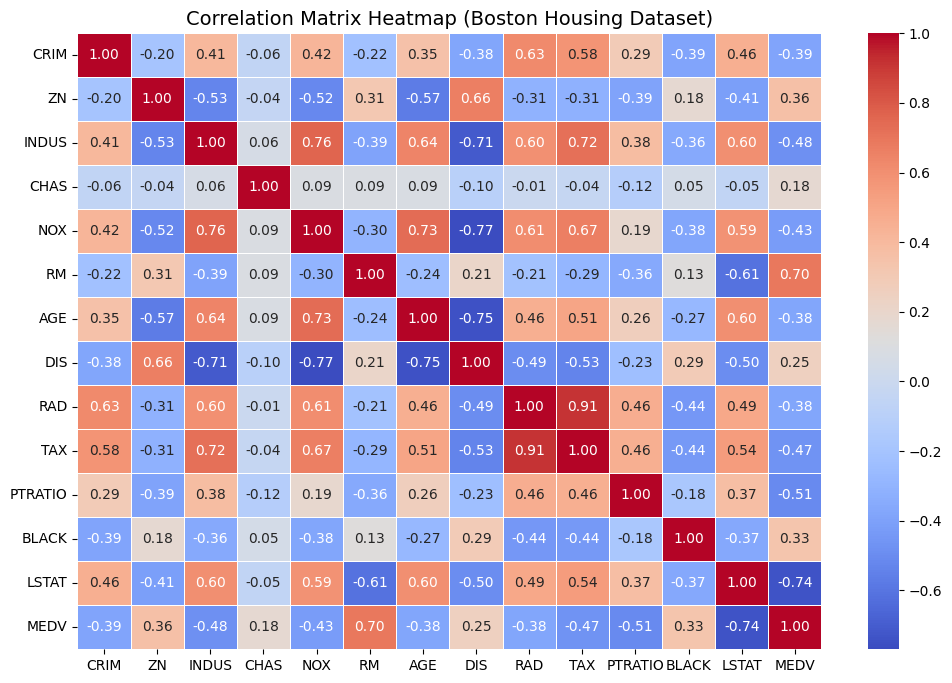

In [53]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])


corr_matrix = df.corr()


plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap (Boston Housing Dataset)", fontsize=14)
plt.show()

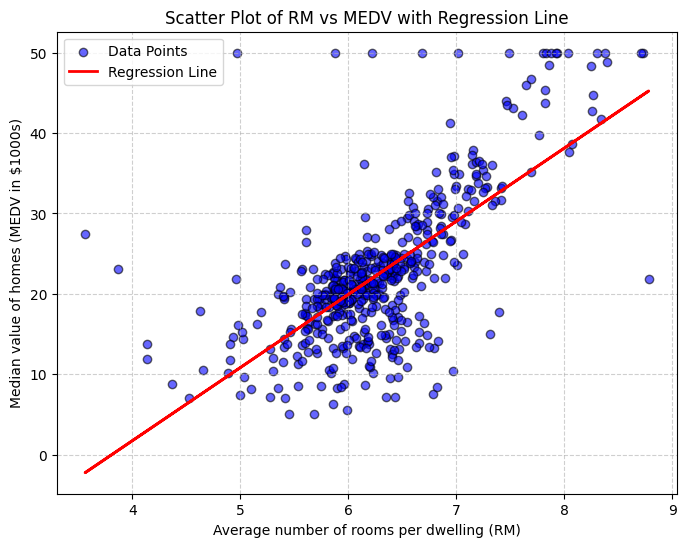

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df['RM'], df['MEDV'], color='blue', alpha=0.6, edgecolors='k', label='Data Points')
m, b = np.polyfit(df['RM'], df['MEDV'], 1)   
plt.plot(df['RM'], m * df['RM'] + b, color='red', linewidth=2, label='Regression Line')


plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Median value of homes (MEDV in $1000s)")
plt.title("Scatter Plot of RM vs MEDV with Regression Line")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.show()

Average MEDV based on CHAS values:
CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64


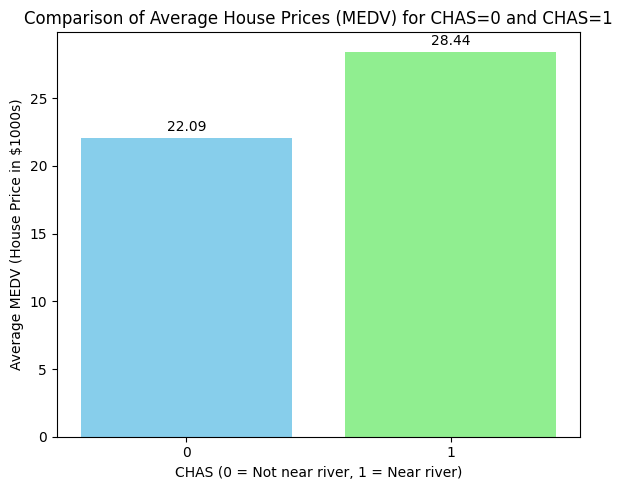

In [14]:
avg_medv = df.groupby('CHAS')['MEDV'].mean()
print("Average MEDV based on CHAS values:")
print(avg_medv)


plt.figure(figsize=(6,5))
plt.bar(avg_medv.index.astype(str), avg_medv.values, color=['skyblue', 'lightgreen'])
plt.xlabel("CHAS (0 = Not near river, 1 = Near river)")
plt.ylabel("Average MEDV (House Price in $1000s)")
plt.title("Comparison of Average House Prices (MEDV) for CHAS=0 and CHAS=1")


for i, value in enumerate(avg_medv.values):
    plt.text(i, value + 0.5, f"{value:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
corr_matrix = df.corr()


medv_corr = corr_matrix['MEDV'].sort_values()


print("Correlation of each feature with MEDV:")
print(medv_corr)


most_neg_corr = medv_corr.idxmin()  
corr_value = medv_corr.min()        

print("\nMost negatively correlated feature with MEDV:")
print(f"{most_neg_corr}  (Correlation = {corr_value:.4f})")

Correlation of each feature with MEDV:
LSTAT        -0.737663
PTRATIO      -0.507787
INDUS        -0.483725
TAX          -0.468536
NOX          -0.427321
CRIM         -0.388305
RAD          -0.381626
AGE          -0.376955
Unnamed: 0   -0.226604
CHAS          0.175260
DIS           0.249929
BLACK         0.333461
ZN            0.360445
RM            0.695360
MEDV          1.000000
Name: MEDV, dtype: float64

Most negatively correlated feature with MEDV:
LSTAT  (Correlation = -0.7377)


Average MEDV for each RAD (highway accessibility) group:
RAD
1     24.365000
2     26.833333
3     27.928947
4     21.387273
5     25.706957
6     20.976923
7     27.105882
8     30.358333
24    16.403788
Name: MEDV, dtype: float64


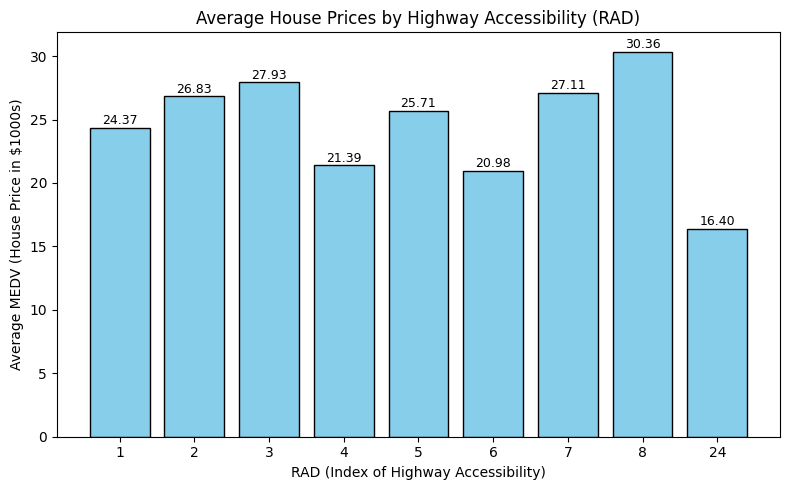

In [16]:
avg_medv_by_rad = df.groupby('RAD')['MEDV'].mean()
print("Average MEDV for each RAD (highway accessibility) group:")
print(avg_medv_by_rad)


plt.figure(figsize=(8,5))
plt.bar(avg_medv_by_rad.index.astype(str), avg_medv_by_rad.values, color='skyblue', edgecolor='black')


plt.xlabel("RAD (Index of Highway Accessibility)")
plt.ylabel("Average MEDV (House Price in $1000s)")
plt.title("Average House Prices by Highway Accessibility (RAD)")


for i, value in enumerate(avg_medv_by_rad.values):
    plt.text(i, value + 0.3, f"{value:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\Tanisha Narayan\AppData\Local\Temp\ipykernel_22840\518584575.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PTRATIO_cat", y="MEDV", data=df, palette="Set2")


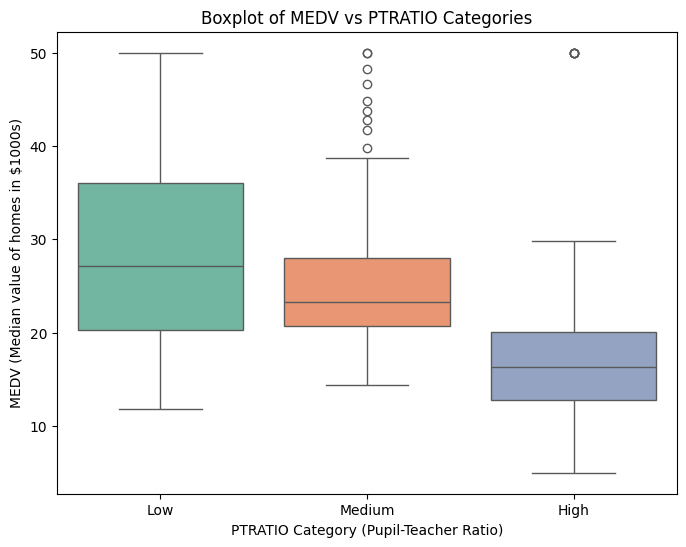

In [18]:
df['PTRATIO_cat'] = pd.cut(df['PTRATIO'],
                           bins=[0, 16, 20, 25],
                           labels=['Low', 'Medium', 'High'])


plt.figure(figsize=(8,6))
sns.boxplot(x="PTRATIO_cat", y="MEDV", data=df, palette="Set2")
plt.title("Boxplot of MEDV vs PTRATIO Categories")
plt.xlabel("PTRATIO Category (Pupil-Teacher Ratio)")
plt.ylabel("MEDV (Median value of homes in $1000s)")
plt.show()

In [1]:
plt.figure(figsize=(8,6))
sns.regplot(x="LSTAT", y="MEDV", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Relationship between LSTAT and MEDV")
plt.xlabel("LSTAT (% Lower Status Population)")
plt.ylabel("MEDV (Median value of homes in $1000s)")
plt.show()

NameError: name 'plt' is not defined